In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df_index=pd.read_csv('economic_index.csv')

In [35]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [36]:
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [37]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [38]:
##check any null value present
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

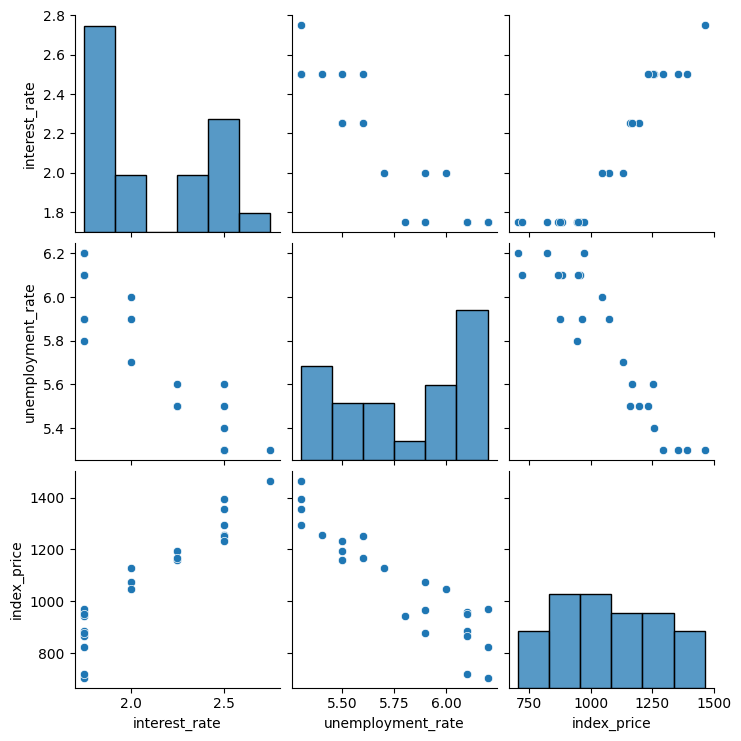

In [39]:
import seaborn as sns
sns.pairplot(df_index)

In [40]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


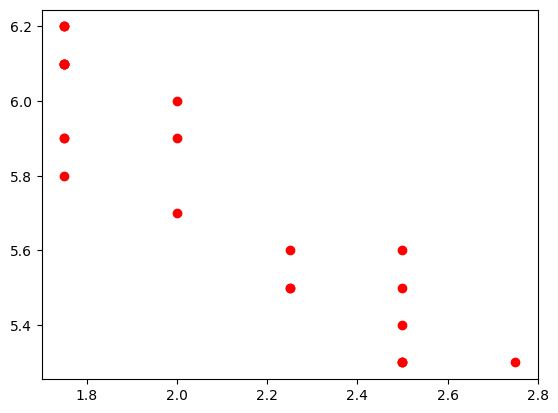

In [41]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')

In [42]:
##step 1 devide independent and dependent feature
## X=df_index[['interest_rate'],['unemployment_rate']] ## or
X=df_index.iloc[:,:-1]
Y=df_index.iloc[:,-1]

In [43]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [44]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [45]:
## step 2 train test split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

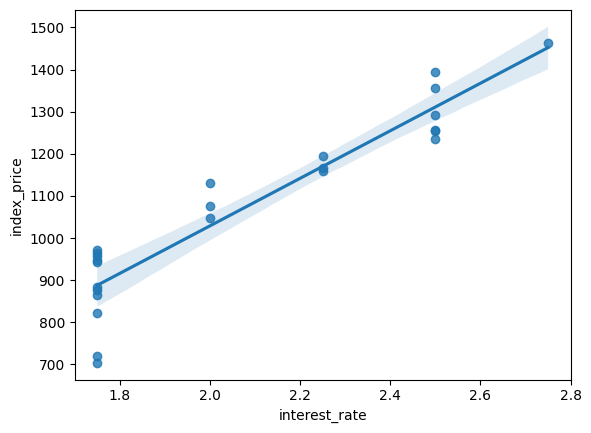

In [46]:
import seaborn as sns ## extra knowledge
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

In [47]:
## step 3 standerdization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [48]:
## step 4 linear regression model

from sklearn.linear_model import LinearRegression
regression= LinearRegression()


In [49]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

## suppose CV=5 total data 1000, 900 train data 100 test data.
##under 900/CV = 180
##mse1 diff from 180-train-train-train-train
##mse1 diff from train-180-train-train-train|
##mse1 diff from train-train-180-train-train
##mse1 diff from train-train-train-180-train
##mse1 diff from train-train-train-train-180


In [51]:
### Step 6 -Prediction of test data
###1.predicted height output= intercept + coeff(weigth)
###2. y_pred_test= 156.47 + 17.29(X_test)

In [52]:
Y_pred=regression.predict(X_test)

In [53]:
### Step 7 - performance matrics

from sklearn.metrics import mean_absolute_error,mean_squared_error


In [54]:
mse=mean_squared_error(Y_pred,Y_test)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [56]:
###R Square
###R^2 = 1- SSR/SST
###R^2 = coefficient of determination SSR = Sum of square of reciduals SST = total sum of squares

In [57]:
from sklearn.metrics import r2_score

In [58]:
score = r2_score(Y_test,Y_pred)
print(score)

0.8278978091457145


In [59]:
## display adjusted R2
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7131630152428576

##ASUMPTIONS

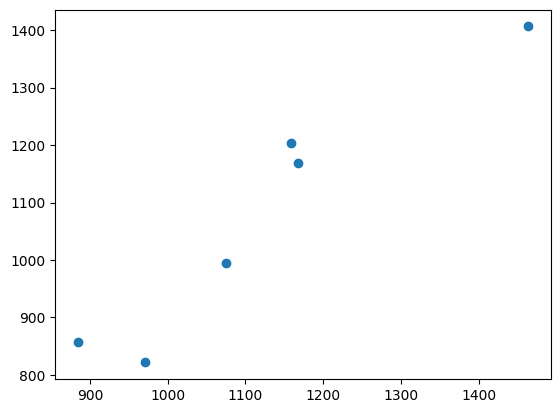

In [60]:
plt.scatter(Y_test,Y_pred)

In [61]:
## recidual
residual=Y_test-Y_pred
print(residual)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


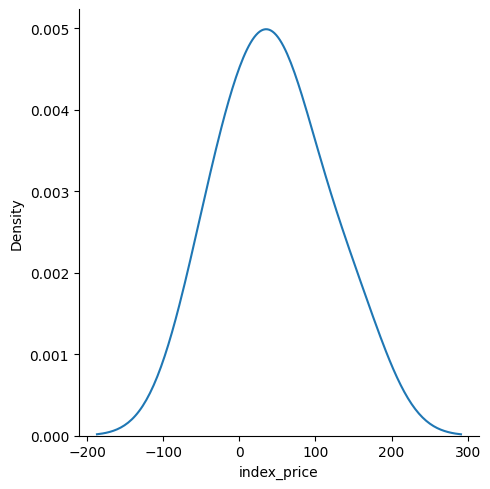

In [62]:
sns.displot(residual,kind='kde') ## if that perticular curv get it means OK

In [63]:
## OLS linear regression
import statsmodels.api as sm

In [64]:
model=sm.OLS(Y_train,X_train).fit()

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 14 Feb 2026   Prob (F-statistic):                       0.754
Time:                        23:10:30   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
regression.predict(scaler.transform([[1.5,2.5]]))

C:\Users\omphu\Desktop\Data Science & AIML\Practice\Venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2090.72619712])